In the first exercise I did preprocessing of the given data. For the future work I chose drug LSD, I made correlation matcics and undersood that LSD had the maximum dependancy with Oscore. More over I decided to make new data named data_analys which had only colums LSD and ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore','Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']. In data_analys_lsd_bin.insert I changed values of LSD. If person at least 1 time get LSD I put 1, in other cases 0
___________
In the second exersise I made three hypotheses related to LSD.
1. A lot of people do not get LCD. It was right. More than the half of the respondents do never get LSD (56.7%)
2. LSD had a maximum correlation with Oscore (Openness to experience). So I suppose that the shorter ages, the greater probability of taking LSD. It was right too. In the ages 18-24 person had the greatest probability to get LSD
3. More over I suppose that if person had the worse education, he had the most probability to get LSD. It was not right. I got that peoples in the college or university, no certificate or degree had the most probability to get LSD. But if the person had a really good education this probability declining
___________
In the third  task I analysed the balance of the target variable and understood that my problem is imbalanced, so I used stratify parameter. I made a functions that can plot Confusion Matrix, Classification Report and Receiver operating characteristic. In the next steps I evaluated results based on plot of this functions.
___________
In the fourth task I use StandardScaler() for preprocessing my model and implement a pipeline to combine with LogisticRegression. Also I made Random Forest model with StratifiedKFold because of dataset imbalanced. I plot ROC curve for each model. The best result was after using GridSearchCV. With it help I found that the best parametrs max_depth and n_estimators and the ROC curve came out equal 0.80.

### 1. Preprocessing

In [67]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
#read the data
data = pd.read_csv('drug_consumption.csv')
data_copy = data.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [69]:
data

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,...,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,...,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,...,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,...,CL3,CL0,CL0,CL3,CL3,CL0,CL3,CL4,CL0,CL0


In [70]:
data.describe()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS
count,1885.000000,1885.00000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000,1885.000000
mean,945.294960,0.03461,-0.000256,-0.003806,0.355542,-0.309577,0.000047,-0.000163,-0.000534,-0.000245,-0.000386,0.007216,-0.003292
std,545.167641,0.87836,0.482588,0.950078,0.700335,0.166226,0.998106,0.997448,0.996229,0.997440,0.997523,0.954435,0.963701
min,1.000000,-0.95197,-0.482460,-2.435910,-0.570090,-1.107020,-3.464360,-3.273930,-3.273930,-3.464360,-3.464360,-2.555240,-2.078480
25%,474.000000,-0.95197,-0.482460,-0.611130,-0.570090,-0.316850,-0.678250,-0.695090,-0.717270,-0.606330,-0.652530,-0.711260,-0.525930
50%,946.000000,-0.07854,-0.482460,-0.059210,0.960820,-0.316850,0.042570,0.003320,-0.019280,-0.017290,-0.006650,-0.217120,0.079870
75%,1417.000000,0.49788,0.482460,0.454680,0.960820,-0.316850,0.629670,0.637790,0.723300,0.760960,0.584890,0.529750,0.765400
max,1888.000000,2.59171,0.482460,1.984370,0.960820,1.907250,3.273930,3.273930,2.901610,3.464360,3.464360,2.901610,1.921730


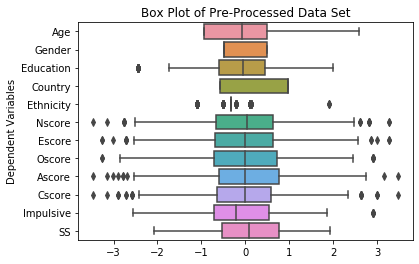

In [71]:
import pandas as pnd
feature_col_names = ['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS']
#f, box_plt = plt.subplots(figsize=(11, 15))
plt.ylabel('Dependent Variables')
plt.title("Box Plot of Pre-Processed Data Set")
box_plt = sns.boxplot(data = data[feature_col_names], orient = 'h')
#box_plt.set(xlim=(-0.3, 4))

In [72]:
name_drugs = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']


In [73]:
# Encode columns into numeric data
from sklearn.preprocessing import LabelEncoder
for column in name_drugs:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])

In [74]:
correlation =  data.corr()
correlation.style.background_gradient(cmap='coolwarm').set_precision(1)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,1,-0.3,-0.03,-0.03,-0.3,0.06,0.02,-0.05,0.2,-0.03,-0.07,0.1,0.2,-0.02,0.2,-0.03,0.2,-0.006,0.2,-0.06,0.09,0.08,0.2,0.09,0.07,0.2,0.2,0.2,0.2,0.06,0.05,0.1
Age,-0.3,1,0.1,0.2,0.4,-0.07,-0.1,-0.03,-0.2,0.06,0.2,-0.2,-0.3,-0.03,-0.2,-0.1,-0.1,0.04,-0.4,0.05,-0.2,-0.05,-0.4,-0.1,-0.2,-0.4,-0.3,-0.2,-0.3,-0.2,-0.05,-0.2
Gender,-0.03,0.1,1,0.2,0.2,-0.001,0.07,0.06,-0.1,0.2,0.2,-0.2,-0.2,-0.003,-0.2,-0.2,-0.1,-0.01,-0.3,0.07,-0.2,-0.2,-0.2,-0.1,-0.2,-0.3,-0.3,-0.2,-0.3,-0.2,0.01,-0.1
Education,-0.03,0.2,0.2,1,0.2,-0.04,-0.1,0.1,0.06,0.09,0.2,-0.1,-0.1,0.1,-0.2,-0.003,-0.1,0.04,-0.3,0.03,-0.1,-0.1,-0.2,-0.1,-0.08,-0.2,-0.2,-0.2,-0.2,-0.2,-0.04,-0.1
Country,-0.3,0.4,0.2,0.2,1,-0.1,-0.1,0.1,-0.3,0.2,0.2,-0.2,-0.3,0.08,-0.4,0.08,-0.4,0.005,-0.6,0.1,-0.3,-0.2,-0.3,-0.3,-0.1,-0.4,-0.5,-0.4,-0.5,-0.3,-0.07,-0.3
Ethnicity,0.06,-0.07,-0.001,-0.04,-0.1,1,0.05,0.02,0.08,-0.04,-0.03,0.08,0.1,0.05,0.08,0.04,0.1,0.08,0.1,0.02,0.09,0.04,0.07,0.04,0.03,0.08,0.1,0.06,0.1,0.08,0.02,0.09
Nscore,0.02,-0.1,0.07,-0.1,-0.1,0.05,1,-0.4,0.01,-0.2,-0.4,0.2,0.08,-0.002,0.1,0.03,0.3,0.01,0.1,0.01,0.1,0.1,0.07,0.2,0.06,0.1,0.04,0.2,0.04,0.1,-0.002,0.1
Escore,-0.05,-0.03,0.06,0.1,0.1,0.02,-0.4,1,0.2,0.2,0.3,0.1,0.2,0.09,-0.04,0.03,-0.1,0.05,-0.01,0.02,0.03,-0.05,0.08,-0.08,0.02,-0.04,0.02,-0.1,0.02,-0.02,0.02,-0.03
Oscore,0.2,-0.2,-0.1,0.06,-0.3,0.08,0.01,0.2,1,0.04,-0.06,0.3,0.4,0.03,0.2,0.06,0.2,0.03,0.4,0.001,0.2,0.1,0.3,0.1,0.2,0.3,0.4,0.2,0.4,0.2,0.03,0.2
Ascore,-0.03,0.06,0.2,0.09,0.2,-0.04,-0.2,0.2,0.04,1,0.2,-0.2,-0.2,-0.02,-0.1,-0.1,-0.2,-0.02,-0.1,0.04,-0.2,-0.1,-0.1,-0.2,-0.1,-0.1,-0.09,-0.2,-0.1,-0.1,0.02,-0.1


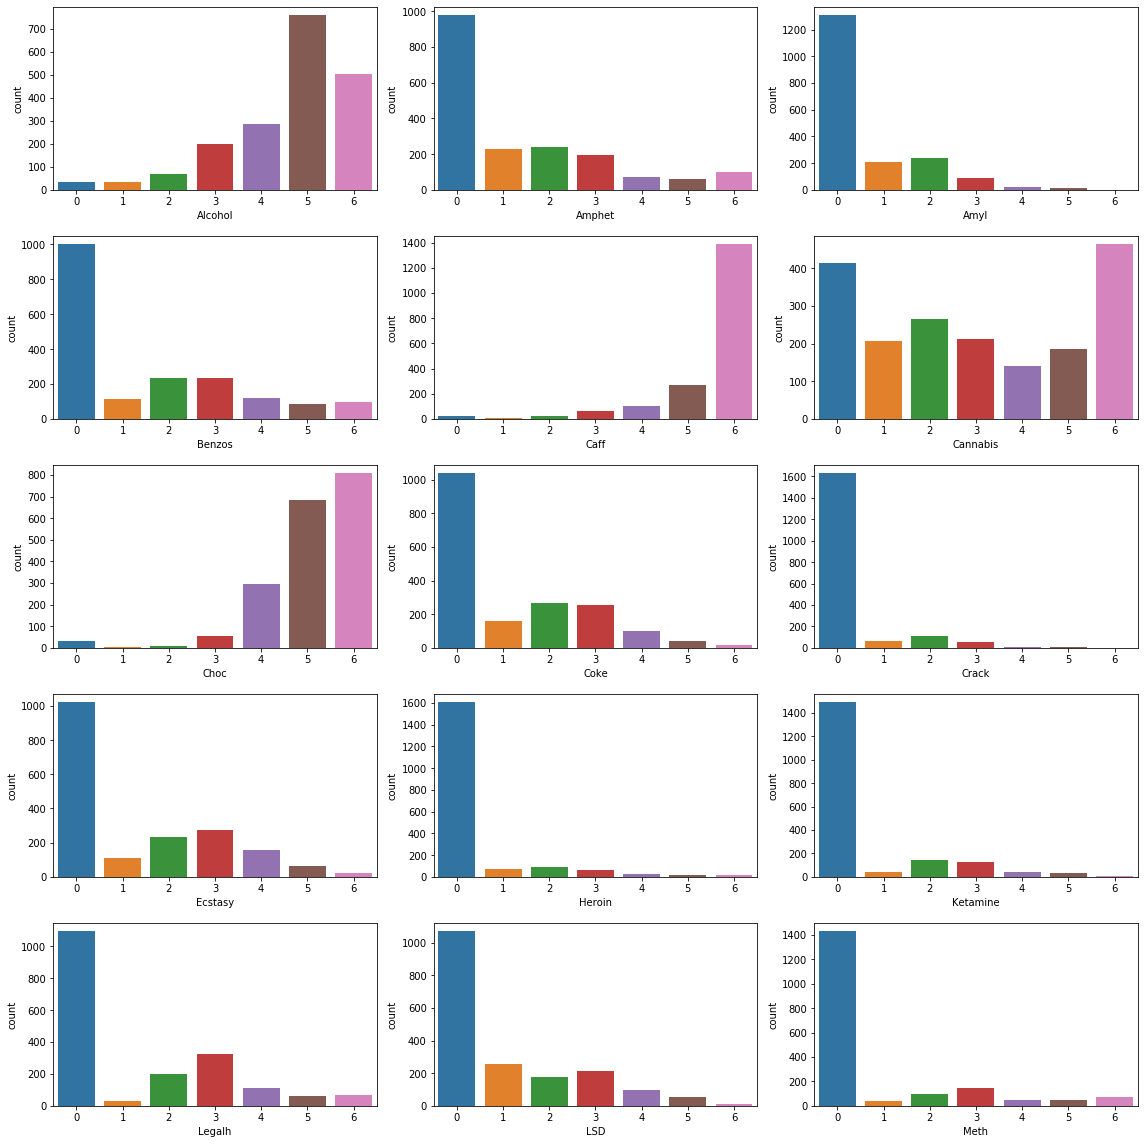

In [75]:
"""
0-never
1-decage ago
2-last decade
3-last year
4-last month
5-last week
6-last day
"""
fig, axes = plt.subplots(5,3,figsize = (16,16))
k=0
for i in range(5):
    for j in range(3):
        sns.countplot(x=name_drugs[k], data=data,ax=axes[i][j])
        k+=1
plt.tight_layout()
plt.show()

In [76]:
#I have chosen drugs LSD to analyse in future work
c = -1
for i in correlation['LSD'].drop(data[name_drugs]):
    if i != 1:
        if i > c :
            c = i
print('the highest correlation:', c)

the highest correlation: 0.3697591105190999


In [77]:
#find maximum dependense
z = correlation['LSD'].drop(data[name_drugs])
highest_corr = z.idxmax()
print (highest_corr)

Oscore


In [78]:
"""
My binary target combining: 0 - never get LSD, 1 - at least 1 time get LSD. 
I think that it is the most suitable choise in this situation
"""
data_lsd_bin = data['LSD'].copy()
for i in range(len(data['LSD'].values)):
    if data['LSD'].values[i] == 0:
        data_lsd_bin[i]= 0
    else:
        data_lsd_bin[i]=1

In [79]:
name_drugs_whithout_lsd = ['Alcohol','Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
           'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'Meth', 'Mushrooms','Nicotine', 'Semer', 'VSA']

In [80]:
#drop columns directly associated with the selected target
data_analys = data.drop(data[name_drugs],axis=1)
data_analys_lsd_bin = data_analys.copy()

In [81]:
data_analys.insert(13,'LSD',data['LSD'])
data_analys_lsd_bin.insert(13,'LSD',data_lsd_bin)

In [82]:
data_analys

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,LSD
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,2
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,3
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,5
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,2
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,3


In [83]:
data_analys_lsd_bin

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,LSD
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,1
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1880,1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,1
1881,1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,1
1882,1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,1
1883,1887,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,0.91093,-1.92173,0.29338,-1.62090,-2.57309,1.29221,1.22470,1


### 2. Exploratory analysis

In [84]:
predicted_class_names = data_analys['LSD']
predicted_class_names_bin = data_analys_lsd_bin['LSD']
#__________________________________

Text(0.5, 1.0, 'Last time people get LCD')

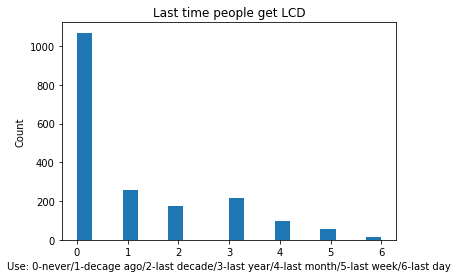

In [85]:
# Hyp.1
# A lot of people do not get LCD->true (more than the half)
plt.hist(data_analys['LSD'], bins=20)
plt.xlabel('Use: 0-never/1-decage ago/2-last decade/3-last year/4-last month/5-last week/6-last day')
plt.ylabel('Count')
plt.title('Last time people get LCD')

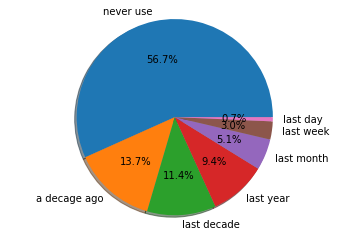

In [86]:
labels = 'never use', 'a decage ago', 'last decade', 'last year', 'last month','last week','last day'
sizes = predicted_class_names.value_counts().values

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

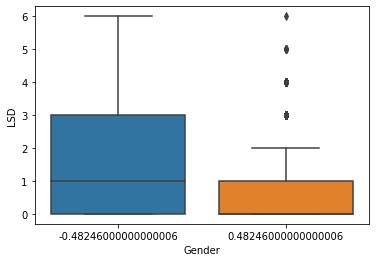

In [87]:
#________________________________________________
sns.boxplot(x='Gender', y='LSD', data=data_analys)

#0.48246 Female 942 49.97%
#-0.48246 Male 943 50.03%

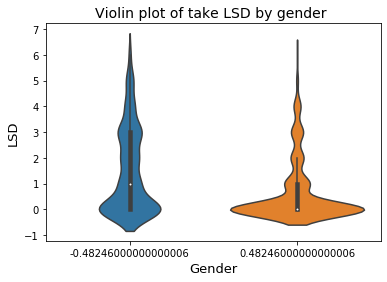

In [88]:
sns.violinplot(x='Gender', y='LSD', data=data_analys)
plt.title('Violin plot of take LSD by gender ',fontsize=14)
plt.xlabel('Gender',fontsize=13)
plt.ylabel('LSD',fontsize=13)
plt.show()

In [89]:
#_____________________________

Text(0.5, 1.0, 'Age dependance of get LCD')

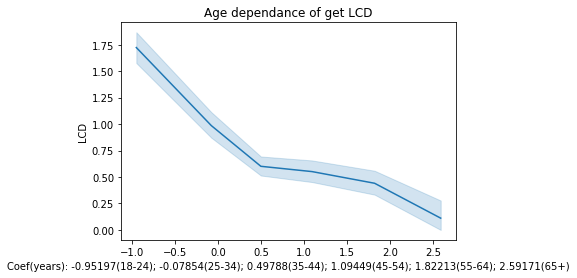

In [90]:
"""
Hyp . 2
If the person is 18-24 age, he has the biggest probabitily to take LSD, because of Oscore correlation
->true
"""
sns.lineplot(x=data_analys['Age'].values,y=data_analys['LSD'].values)
plt.xlabel('Coef(years): -0.95197(18-24); -0.07854(25-34); 0.49788(35-44); 1.09449(45-54); 1.82213(55-64); 2.59171(65+)')
plt.ylabel('LCD')
plt.title('Age dependance of get LCD')

Text(0.5, 1.0, 'Edu dependance of get LSD')

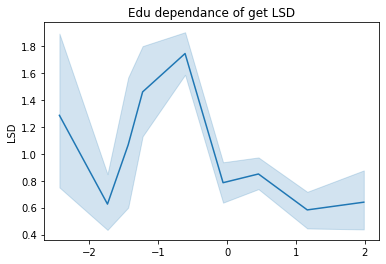

In [91]:
"""
Hyp. 3

the worse education, the most probability to take LSD -> false

The biggest:
Some college or university, no certificate or degree, 
University degree 

-2.43591 Left school before 16 years 28 
-1.73790 Left school at 16 years 99 
-1.43719 Left school at 17 years 30 
-1.22751 Left school at 18 years 100 
-0.61113 Some college or university, no certificate or degree 506 
-0.05921 Professional certificate/ diploma 270 
0.45468 University degree 480 
1.16365 Masters degree 283 
1.98437 Doctorate degree 89 
"""
sns.lineplot(x=data_analys['Education'].values,y=data_analys['LSD'])
#plt.xlabel('Coef(years): -0.95197(18-24); -0.07854(25-34); 0.49788(35-44); 1.09449(45-54); 1.82213(55-64); 2.59171(65+)')
plt.ylabel('LSD')
plt.title('Edu dependance of get LSD')

### 3. Metrics & Validation

In [92]:
data_lsd_bin.value_counts()

0    1069
1     816
Name: LSD, dtype: int64

In [93]:
1069+816


1885

In [94]:
# As we cap see in ax1.pie and here in my situation problem is imbalanced
#So in my task I will watch in parameter(metric) ROC curve
print('Never take LSD =',1069*100/1885,'%')
print('At least 1 time Take LSD =',816*100/1885,'%')

Never take LSD = 56.710875331564985 %
At least 1 time Take LSD = 43.289124668435015 %


In [95]:
from sklearn.model_selection import train_test_split
X = data_analys[feature_col_names].values
y = data_analys_lsd_bin['LSD'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

In [96]:
from sklearn.metrics import roc_curve,auc
from sklearn import metrics

def plot_confusion_metrix(y_test,model_test):
    cm = metrics.confusion_matrix(y_test, model_test)
    plt.figure(1)
    plt.clf()
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
    classNames = ['Non-User','User']
    plt.title('Confusion Matrix')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks, classNames)
    plt.yticks(tick_marks, classNames)
    s = [['TN','FP'], ['FN', 'TP']]
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
    plt.show()
    
def report_performance(model):

    model_test = model.predict(X_test)

    print("\n\nConfusion Matrix:")
    print("{0}".format(metrics.confusion_matrix(y_test, model_test)))
    print("\n\nClassification Report: ")
    print(metrics.classification_report(y_test, model_test))
    plot_confusion_metrix(y_test, model_test)


def roc_curves(model):
    predictions_test = model.predict(X_test)
    fpr, tpr, thresholds = roc_curve(predictions_test,y_test)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

In [97]:
from sklearn.svm import SVC



Confusion Matrix:
[[243  78]
 [ 88 157]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       321
           1       0.67      0.64      0.65       245

    accuracy                           0.71       566
   macro avg       0.70      0.70      0.70       566
weighted avg       0.71      0.71      0.71       566



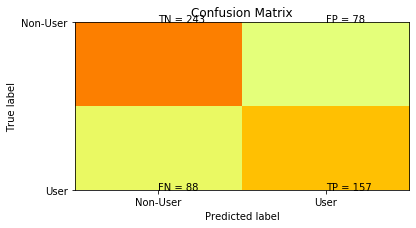

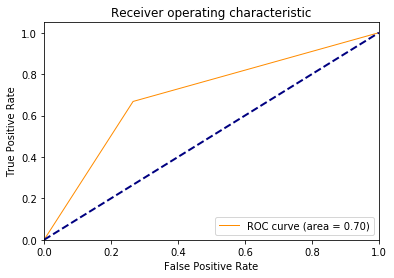

In [98]:
s = SVC(kernel="linear", C=1,random_state=0)
s.fit(X_train, y_train.ravel())
report_performance(s) 
roc_curves(s)

In [99]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1319, 12), (566, 12), (1319,), (566,))

### 4. ML models

In [100]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline

In [101]:
pipe = Pipeline([('ss', StandardScaler()), ('lr', LogisticRegressionCV())])

In [102]:
p1 = pipe.set_params(lr__Cs=30,lr__cv = StratifiedKFold(n_splits = 8), lr__penalty = 'l1', lr__solver = 'liblinear', lr__scoring = 'f1_weighted')
p1.fit(X_train, y_train)
print(p1.named_steps.lr.C_)
print(p1.named_steps.lr.score(X_train, y_train))

d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: Undefin

[0.10826367]
0.7338458465666382


d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
d:\programs\python\lib\site-packages\sklearn\metrics\classification.py:1437: Undefin

In [103]:
p2 = pipe.set_params(lr__Cs=30,lr__cv = StratifiedKFold(n_splits = 8), lr__penalty = 'l2', lr__scoring = 'f1_weighted')
p2.fit(X_train, y_train)
print(p2.named_steps.lr.C_)
print(p2.named_steps.lr.score(X_train, y_train))

[0.01610262]
0.7377634595028042


d:\programs\python\lib\site-packages\sklearn\linear_model\logistic.py:2260: ChangedBehaviorWarning: The long-standing behavior to use the accuracy score has changed. The scoring parameter is now used. This warning will disappear in version 0.22.
  ChangedBehaviorWarning)




Confusion Matrix:
[[250  71]
 [ 79 166]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       321
           1       0.70      0.68      0.69       245

    accuracy                           0.73       566
   macro avg       0.73      0.73      0.73       566
weighted avg       0.73      0.73      0.73       566



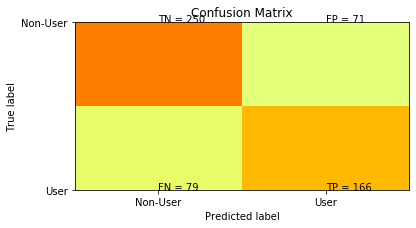

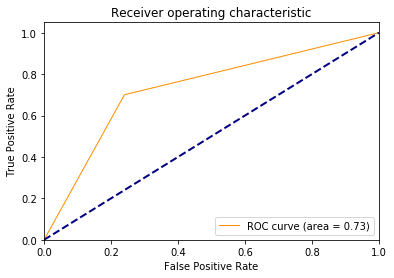

In [104]:
#p2 has the best combination of parameters
#So I use functions writing ealier and refit model with optimal parameters 
#and check the quality of prediction on the test set using graphics (ROC curve), analyse th result 
# compare with previous value and 
#draw Precision-Recall curves

report_performance(p2) 
roc_curves(p2)
#from sklearn.metrics import f1_score
#y_pred = p2.predict(X_test)
#f1_score(y_test,y_pred)

In [105]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [111]:
#make the tree-based model with GridSearchCV
parameters = {'n_estimators': [5,10, 20, 40, 60, 80, 100], 'max_depth':[1, 3, 5, 7,10,15]}
rfc = RandomForestClassifier()
grid = GridSearchCV(rfc, parameters, cv=StratifiedKFold(n_splits = 8), scoring = 'roc_auc')

In [112]:
grid.fit(X_train, y_train)
#print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

Best parameters:  {'max_depth': 7, 'n_estimators': 100}


d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default valu

d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
d:\programs\python\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default valu

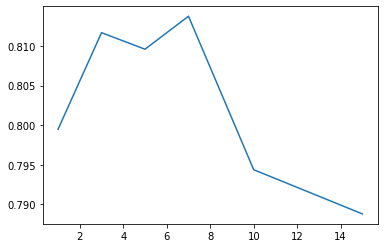

In [113]:
#dependence of GridSearchCV score on max_depth
parameters = {'max_depth':[1, 3, 5, 7,10,15]}
g = GridSearchCV(rfc, parameters, cv = StratifiedKFold(n_splits = 8), scoring = 'roc_auc')
g.fit(X_train, y_train)
sns.lineplot(x=[1, 3, 5, 7,10,15],y=g.cv_results_['mean_test_score'])



Confusion Matrix:
[[262  59]
 [ 53 192]]


Classification Report: 
              precision    recall  f1-score   support

           0       0.83      0.82      0.82       321
           1       0.76      0.78      0.77       245

    accuracy                           0.80       566
   macro avg       0.80      0.80      0.80       566
weighted avg       0.80      0.80      0.80       566



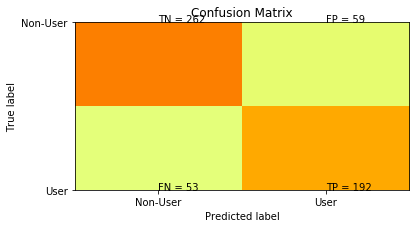

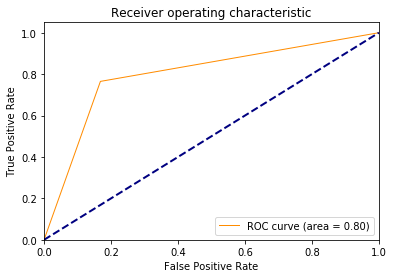

In [117]:
#Check the quality (the best parameters(ROC curve = 0.80)) and 
#draw Precision-Recall curves
rfc = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'],max_depth=grid.best_params_['max_depth'], random_state=42)

for train_index, test_index in StratifiedKFold(n_splits=8).split(X, y):
        X_train2, X_test2 = X[train_index], X[test_index]
        y_train2, y_test2 = y[train_index], y[test_index]
        rfc.fit(X_train2, y_train2.ravel())


report_performance(rfc) 
roc_curves(rfc)

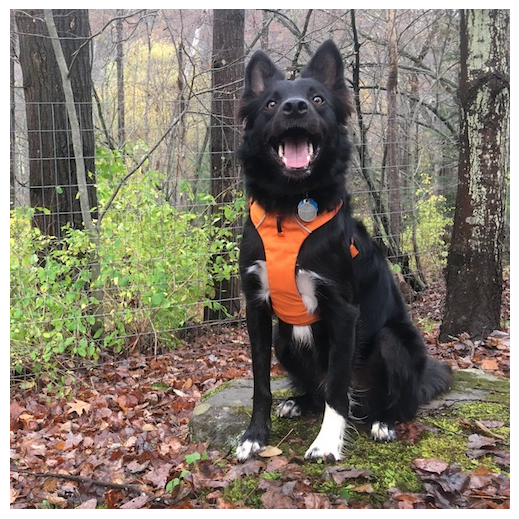

In [115]:
sns.dogplot()

'\n-0.09765 Australia 54 2.86%\n0.24923 Canada 87 4.62%\n-0.46841 New Zealand 5 0.27%\n-0.28519 Other 118 6.26%\n0.21128 Republic of Ireland 20 1.06%\n0.96082 UK 1044 55.38%\n-0.57009 USA 557 29.55%\n'

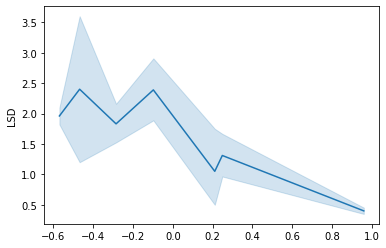

In [48]:
sns.lineplot(x=data_analys['Country'].values,y=data_analys['LSD'])
"""
-0.09765 Australia 54 2.86%
0.24923 Canada 87 4.62%
-0.46841 New Zealand 5 0.27%
-0.28519 Other 118 6.26%
0.21128 Republic of Ireland 20 1.06%
0.96082 UK 1044 55.38%
-0.57009 USA 557 29.55%
"""

'\n-0.50212 Asian 26 1.38%\n-1.10702 Black 33 1.75%\n1.90725 Mixed-Black/Asian 3 0.16%\n0.12600 Mixed-White/Asian 20 1.06%\n-0.22166 Mixed-White/Black 20 1.06%\n0.11440 Other 63 3.34%\n-0.31685 White 1720 91.25%\n'

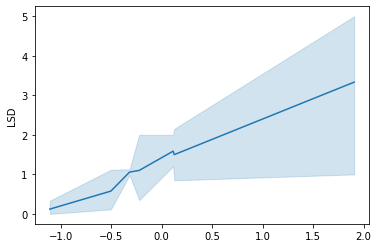

In [49]:
sns.lineplot(x=data_analys['Ethnicity'].values,y=data_analys['LSD'])
"""
-0.50212 Asian 26 1.38%
-1.10702 Black 33 1.75%
1.90725 Mixed-Black/Asian 3 0.16%
0.12600 Mixed-White/Asian 20 1.06%
-0.22166 Mixed-White/Black 20 1.06%
0.11440 Other 63 3.34%
-0.31685 White 1720 91.25%
"""